In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [2]:
bank_data = pd.read_csv('data/bank-full.csv',delimiter=';')

In [3]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

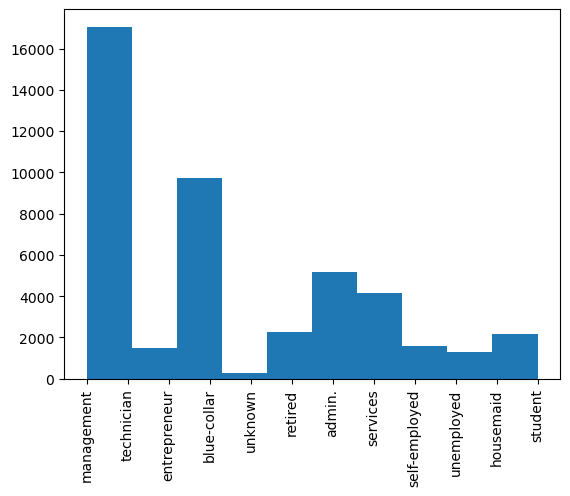

In [6]:
#Evaluate non-numeric columns

plt.hist(bank_data['job'])
plt.xticks(rotation=90)



([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

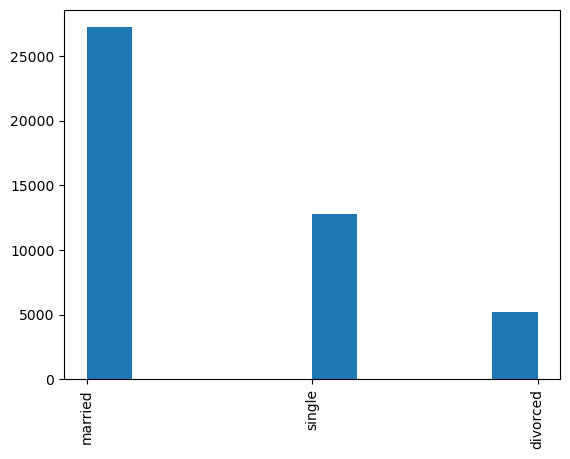

In [7]:
plt.hist(bank_data['marital'])
plt.xticks(rotation=90)

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

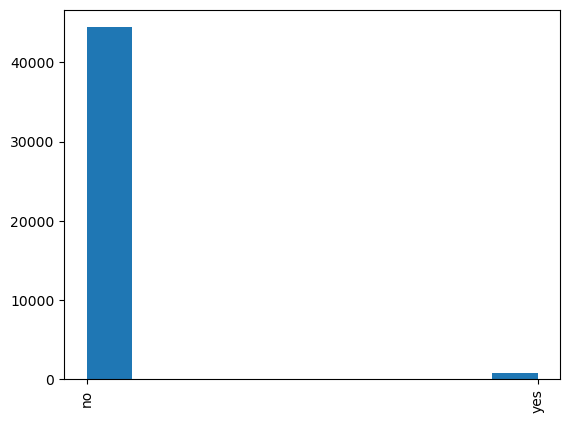

In [46]:
plt.hist(bank_data['default'])
plt.xticks(rotation=90)

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

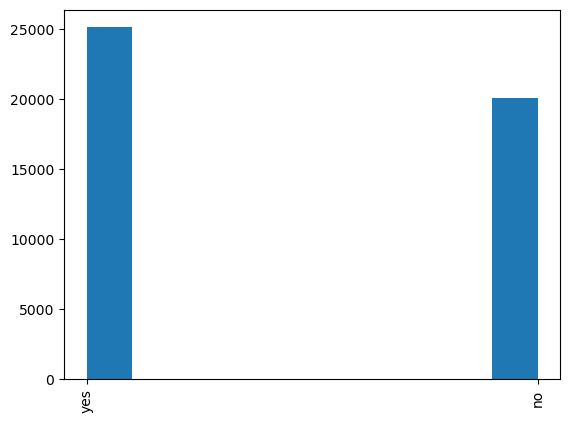

In [8]:
plt.hist(bank_data['housing'])
plt.xticks(rotation=90)

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

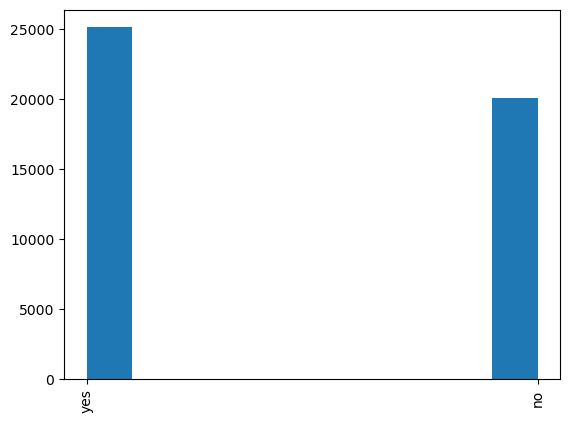

In [48]:
plt.hist(bank_data['housing'])
plt.xticks(rotation=90)

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

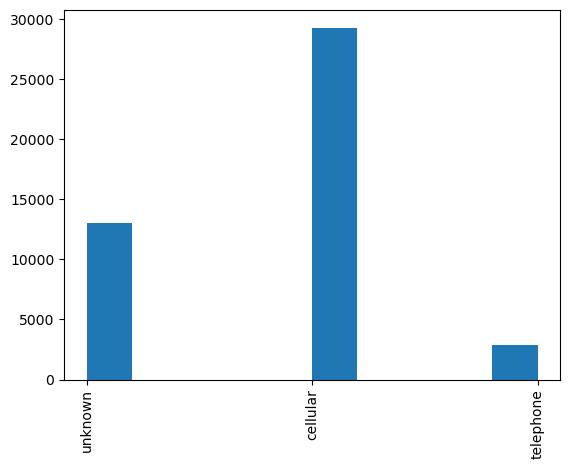

In [9]:
plt.hist(bank_data['contact'])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

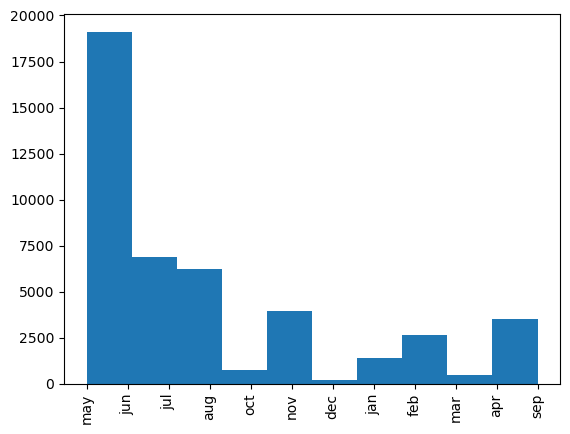

In [50]:
plt.hist(bank_data['month'])
plt.xticks(rotation=90)

In [4]:
# Non-numeric fields are categorical so I could use an encoding technique such as one hot encoder to encode values
# however the purpose of this exercise is to compare the performance of different classifiers.  Since each classifier will
# use the same data. I will just drop the non-numeric columns for ease

bank_data_numeric = bank_data.drop(['education','job','marital','default','housing','contact','month','poutcome'], axis = 1)

#map the loan and y columns to 1 and 0 representations
bank_data_numeric['loan'] = bank_data_numeric['loan'].map({'yes': 1, 'no': 0})
bank_data_numeric['y'] = bank_data_numeric['y'].map({'yes': 1, 'no': 0})



In [5]:
bank_data_numeric.head()

,age,balance,loan,day,duration,campaign,pdays,previous,y
0,58,2143,0,5,261,1,-1,0,0
1,44,29,0,5,151,1,-1,0,0
2,33,2,1,5,76,1,-1,0,0
3,47,1506,0,5,92,1,-1,0,0
4,33,1,0,5,198,1,-1,0,0


In [5]:
#Create training and test sets
X = bank_data_numeric.drop(['y'], axis = 1)
y = bank_data_numeric['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)

Decision Tree Classifier

In [18]:
#Begin Decision Tree Modeling
dtree = DecisionTreeClassifier(random_state = 42).fit(X_train, y_train)
path = dtree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

In [19]:
#Find Best Decision Tree Classifier
dt_train_accs = []
dt_test_accs = []

dt_train_accs = []
dt_test_accs = []
for i in ccp_alphas[:-1]:
    dtree = DecisionTreeClassifier(random_state=42, ccp_alpha=i).fit(X_train, y_train)
    dt_train_accs.append(dtree.score(X_train, y_train))
    dt_test_accs.append(dtree.score(X_test, y_test))

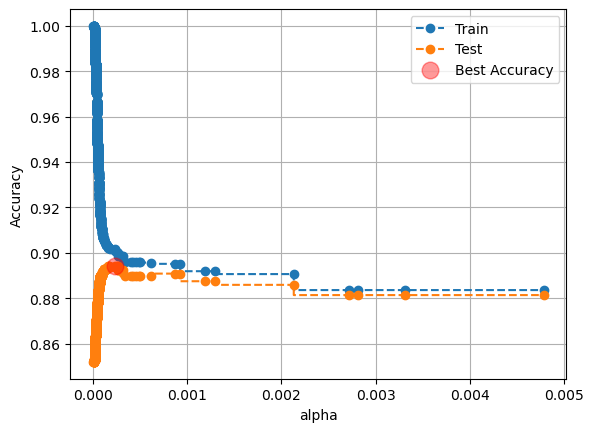

In [80]:
plt.step(ccp_alphas[:-2], dt_train_accs[:-1], '--o', label = 'Train')
plt.step(ccp_alphas[:-2], dt_test_accs[:-1], '--o', label = 'Test')
plt.plot(ccp_alphas[np.argmax(dt_test_accs)], max(dt_test_accs), 'ro', markersize = 12, alpha = 0.4, label = 'Best Accuracy')
plt.legend()
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Accuracy');

In [22]:
ccp_alphas[np.argmax(dt_test_accs)]

0.00023943456926457662

In [23]:
max(dt_test_accs)

0.8943643280544988

Logistic Regression

In [85]:
extractor = SelectFromModel(LogisticRegression(penalty='l1', solver = 'liblinear' ,random_state = 42))

In [91]:
lgr_pipe = Pipeline([('selector', extractor),
                    ('lgr', LogisticRegression(random_state=42, max_iter = 1000))])

lgr_pipe.fit(X_train, y_train)

Pipeline(steps=[('selector',
                 SelectFromModel(estimator=LogisticRegression(penalty='l1',
                                                              random_state=42,
                                                              solver='liblinear'))),
                ('lgr', LogisticRegression(max_iter=1000, random_state=42))])

In [92]:
pipe_1_acc = lgr_pipe.score(X_test, y_test)

In [93]:
pipe_1_acc

0.8843669822171105

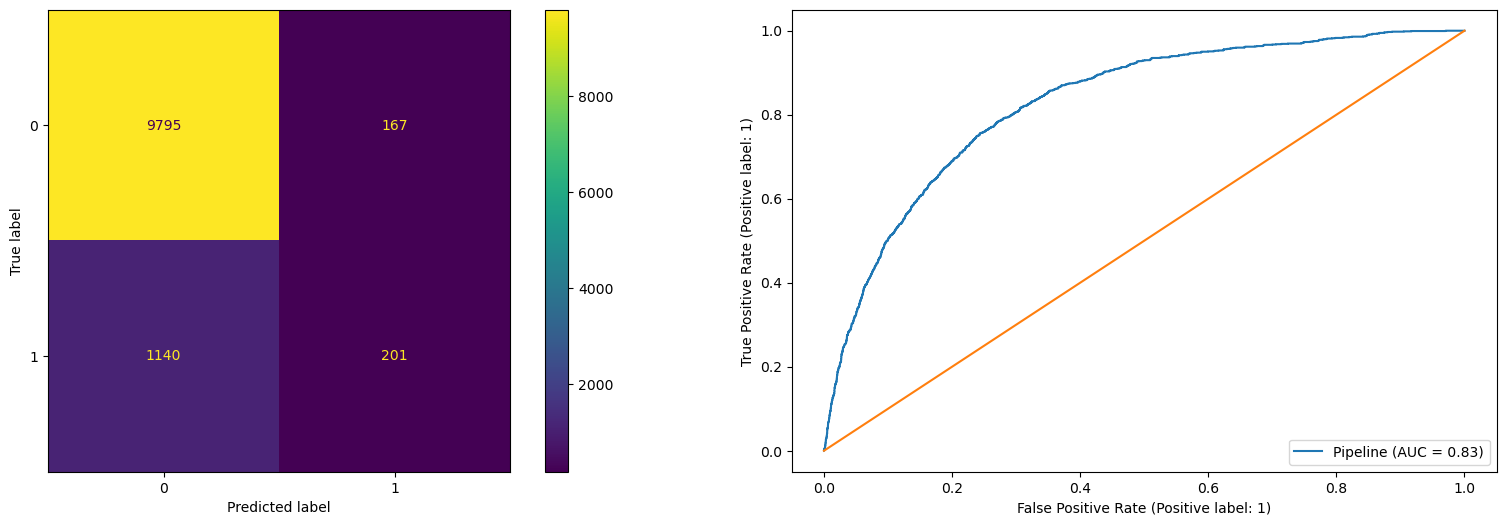

In [96]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(lgr_pipe, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(lgr_pipe, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]))

In [97]:
no_probs = lgr_pipe.predict_proba(X_test)[:, 0]

In [100]:
no_probs

array([0.94192185, 0.97934301, 0.65138117, ..., 0.91662151, 0.92031409,
       0.92222709])

In [101]:
high_prob_no = no_probs[no_probs > 0.8]

In [103]:
percent_of_test_data = len(high_prob_no)/len(y_test)
percent_of_test_data

0.8568521631425285

K nearest neighbor

In [17]:
#determine best k
#note this run took a very long time. 
params = {}
knn_grid = ''
best_k = ''

knn_pipe = Pipeline([('knn', KNeighborsClassifier())])

params = {'knn__n_neighbors': range(1, len(y_test), 2)}
             
knn_grid = RandomizedSearchCV(knn_pipe, params,
                               cv = 2, n_iter = 10, n_jobs=-1)
knn_grid.fit(X_train, y_train)

knn_grid.fit(X_train, y_train)
best_k = knn_grid.best_params_['knn__n_neighbors']
print(best_k)

/Users/aesotechnologies/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aesotechnologies/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value

/Users/aesotechnologies/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aesotechnologies/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value

/Users/aesotechnologies/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aesotechnologies/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value

7075


In [19]:
#best k was determined to be 1531 with the Regressor and 7075 with the classifier
knn = KNeighborsClassifier(n_neighbors=7075)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7075)

In [20]:
y_pred_knn = knn.predict(X_test)

/Users/aesotechnologies/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [24]:
accuracy = accuracy_score(y_test, y_pred_knn)
print(accuracy)

0.8813589312571883


SVC

In [9]:
#Please note this has a very long runt time even with less parameters

params = {'kernel': ['rbf', 'poly', 'linear']}

svc_grid = ''
svc_grid_score = ''

svc = SVC()
#svc_grid = RandomizedSearchCV(svc, params, n_jobs = -1).fit(X_train, y_train)

svc_grid = RandomizedSearchCV(svc, params,
                               cv = 2, n_iter = 2, n_jobs=-1).fit(X_train,y_train)

svc_grid_score = svc_grid.score(X_test, y_test)

In [10]:
svc_grid_score

0.8810050429089622

In [11]:
best_kernel = svc_grid.best_params_['kernel']
best_kernel

'rbf'

In [14]:
svcRBF = SVC(kernel='rbf').fit(X_train,y_train)

In [15]:
y_pred_svc = svcRBF.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred_svc)
print(accuracy)

0.8810050429089622
